In [1]:
!pip install statsmodels

Cointegration for 2 variables

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Load the data
data = pd.read_csv("data3.csv")

# Convert the data to a pandas DataFrame with a datetime index
data.index = pd.date_range(start="1980", periods=len(data), freq="A")

# Select the variable for y1
y1 = data["FDI"]

# Define the options for y2
y2_options = ["revenue expenditure", "capital expenditure", "GDP", "govt debt"]

for y2_name in y2_options:
    y2 = data[y2_name]

    # Create a multivariate time series object
    y = np.array([y1, y2]).T

    # Perform Johansen cointegration test
    johansen_test = coint_johansen(y, det_order=0, k_ar_diff=1)

    # Print the Johansen test results
    print(f"Johansen Test Results for FDI and {y2_name}:")
    print("Eigenvalues:", johansen_test.eig)
    print("Trace statistic:", johansen_test.lr1)
    print("Critical values (trace):", johansen_test.cvt)
    print("Max eigenvalue statistic:", johansen_test.lr2)
    print("Critical values (max eigenvalue):", johansen_test.cvm)

    # Extract test results
    trace_stat = johansen_test.lr1
    critical_values_trace = johansen_test.cvt[:, 1]  # Critical values for 5% significance level

    # Determine the cointegration rank
    coint_rank = np.sum(trace_stat > critical_values_trace)

    print("Cointegration Rank:", coint_rank)
    print("")  # empty line for readability

Johansen Test Results for FDI and revenue expenditure:
Eigenvalues: [0.23668361 0.16552453]
Trace statistic: [23.45379925  9.40950057]
Critical values (trace): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Max eigenvalue statistic: [14.04429868  9.40950057]
Critical values (max eigenvalue): [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
Cointegration Rank: 2

Johansen Test Results for FDI and capital expenditure:
Eigenvalues: [0.35501752 0.01489797]
Trace statistic: [23.58419325  0.78052294]
Critical values (trace): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Max eigenvalue statistic: [22.80367031  0.78052294]
Critical values (max eigenvalue): [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
Cointegration Rank: 1

Johansen Test Results for FDI and GDP:
Eigenvalues: [0.43250137 0.13222761]
Trace statistic: [36.8338235   7.37494258]
Critical values (trace): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Max eigenvalue statistic: [29.45888092  7.3

1. FDI and Revenue Expenditure
The test suggests that there are two cointegrating relationships between FDI and Revenue Expenditure. This means that there are two long-run equilibrium relationships between these two variables.

2. FDI and Capital Expenditure
The test suggests that there is one cointegrating relationship between FDI and Capital Expenditure. This means that there is one long-run equilibrium relationship between these two variables.

3. FDI and GDP
The test suggests that there are two cointegrating relationships between FDI and GDP. This means that there are two long-run equilibrium relationships between these two variables.

4. FDI and Govt Debt
The test suggests that there are two cointegrating relationships between FDI and Govt Debt. This means that there are two long-run equilibrium relationships between these two variables.

In [3]:
from statsmodels.tsa.vector_ar.vecm import select_order

# Determine the maximum number of lags to consider
maxlags = 3

# Use the select_order function to find the optimal number of lags
order_selector = select_order(y, maxlags=maxlags, deterministic="ci")

# Extract the optimal lag length based on AIC
optimal_lag = order_selector.aic
print("Optimal lag length based on AIC:", optimal_lag)

Optimal lag length based on AIC: 3


A lag length of 3 implies that:

The current value of FDI is influenced by its own values 3 periods ago, as well as the values of the other variables (e.g., Revenue Expenditure, Capital Expenditure, GDP, and Govt Debt) 3 periods ago.
The model will include three lagged terms for each variable, which will help to capture the short-term and medium-term relationships between the variables.

VECM Model

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import VECM

# Load your data into a Pandas DataFrame
df = pd.read_csv('data3.csv')

# Select the variable for y1
y1 = df['FDI']

# Define the options for y2
y2_options = ["revenue expenditure", "capital expenditure", "GDP", "govt debt"]

for y2_name in y2_options:
    y2 = df[y2_name]

    # Create a multivariate time series object
    y = np.array([y1, y2]).T

    # Estimate the VECM with one cointegrating variable
    vecm_model = VECM(endog=y, k_ar_diff=1, coint_rank=1, deterministic="ci")
    results = vecm_model.fit()

    # Print the summary of the VECM estimation
    print(f"VECM Estimation for FDI and {y2_name}:")
    print(results.summary())
    print("")  # empty line for readability
    print("")  # empty line for readability
    print("")  # empty line for readability

VECM Estimation for FDI and revenue expenditure:
Det. terms outside the coint. relation & lagged endog. parameters for equation y1
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y1         -0.0881      0.143     -0.617      0.537      -0.368       0.192
L1.y2         -0.1742      0.075     -2.316      0.021      -0.322      -0.027
Det. terms outside the coint. relation & lagged endog. parameters for equation y2
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y1         -0.0683      0.317     -0.216      0.829      -0.689       0.553
L1.y2         -0.0947      0.167     -0.568      0.570      -0.422       0.232
                 Loading coefficients (alpha) for equation y1                 
                 coef    std err          z      P>|z|      [0.025      0.97

This output shows the results of Vector Error Correction Model (VECM) estimation for four different pairs of variables:

FDI (Foreign Direct Investment) and Revenue Expenditure
FDI and Capital Expenditure
FDI and GDP (Gross Domestic Product)
FDI and Govt Debt (Government Debt)

1. FDI and Revenue Expenditure

The loading coefficients (alpha) suggest that FDI responds positively to deviations from the long-run equilibrium, while Revenue Expenditure responds negatively.
The cointegrating relation indicates a positive long-run relationship between FDI and Revenue Expenditure.
2. FDI and Capital Expenditure

The loading coefficients (alpha) suggest that FDI responds negatively to deviations from the long-run equilibrium, while Capital Expenditure responds positively.
The cointegrating relation indicates a negative long-run relationship between FDI and Capital Expenditure.
3. FDI and GDP

The loading coefficients (alpha) suggest that FDI responds negatively to deviations from the long-run equilibrium, while GDP responds positively.
The cointegrating relation indicates a positive long-run relationship between FDI and GDP.
4. FDI and Govt Debt

The loading coefficients (alpha) suggest that FDI responds negatively to deviations from the long-run equilibrium, while Govt Debt responds positively.
The cointegrating relation indicates a negative long-run relationship between FDI and Govt Debt.
Overall, the VECM estimation results suggest that there are significant long-run relationships between FDI and the other variables, and that these relationships are influenced by short-term adjustments to deviations from the long-run equilibrium.

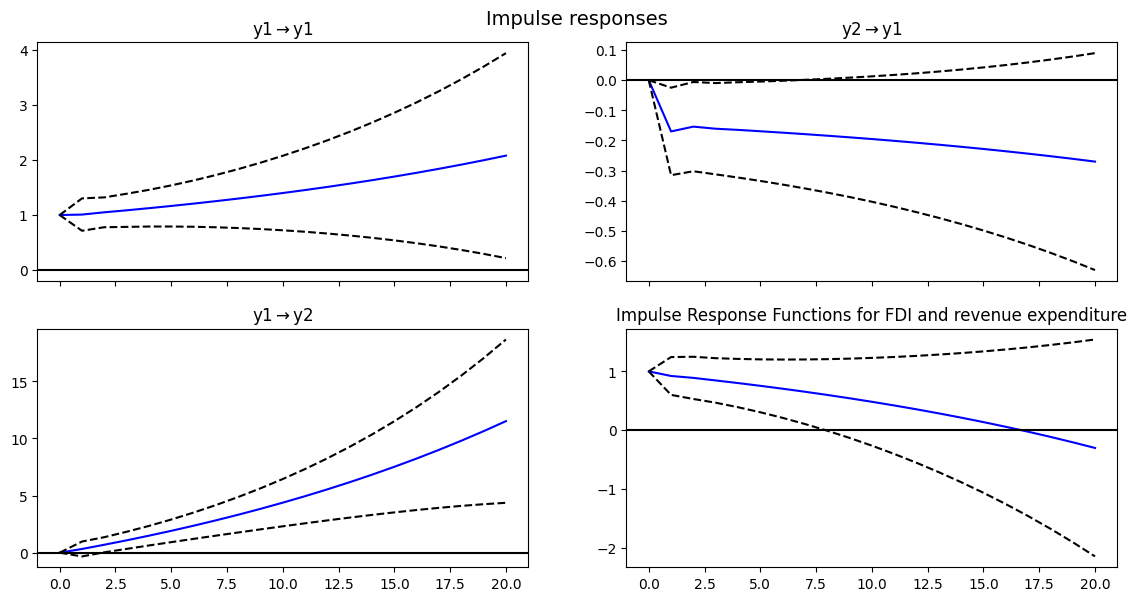

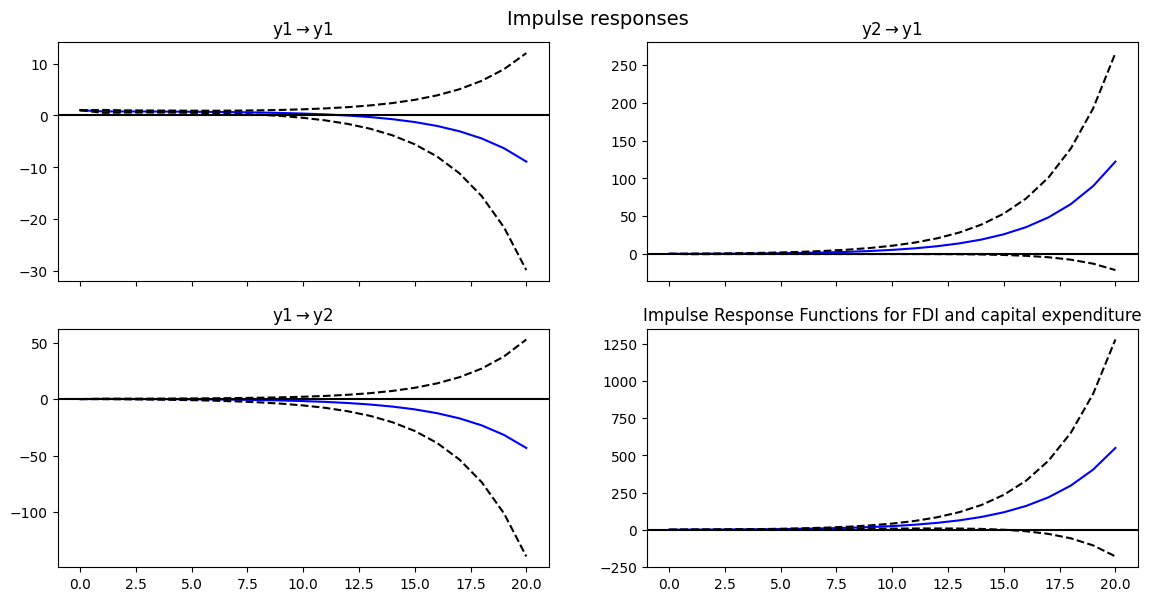

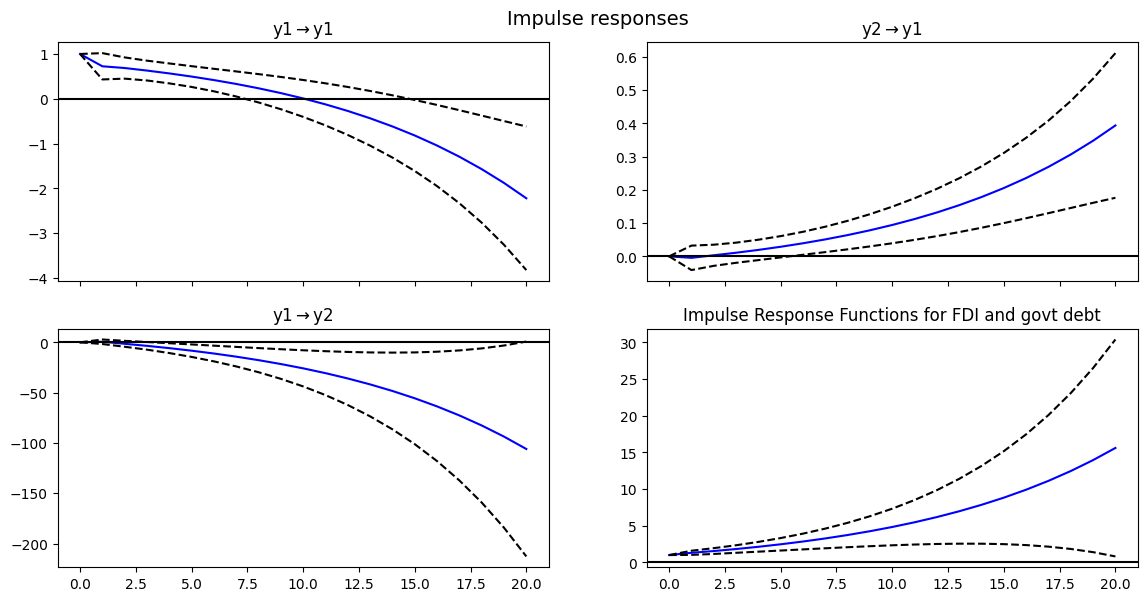

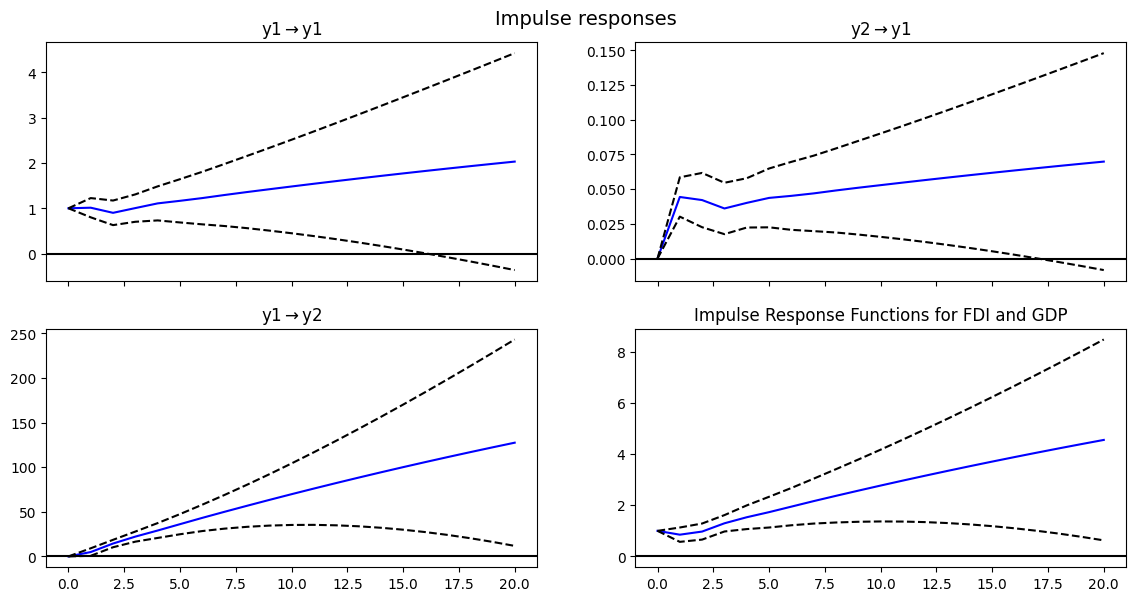

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import VECM

# Load your data into a Pandas DataFrame
df = pd.read_csv('data3.csv')

# Define the options for y2
options = ["revenue expenditure", "capital expenditure", "govt debt", "GDP"]

for y2_name in options:
    y1 = df["FDI"]
    y2 = df[y2_name]

    # Create a multivariate time series object
    y = np.array([y1, y2]).T

    # Estimate the VECM with two cointegrating variables
    vecm_model = VECM(endog=y, k_ar_diff=1, coint_rank=1, deterministic="ci")
    results = vecm_model.fit()

    # Plot the impulse response functions
    irf = results.irf(periods=20)
    irf.plot(figsize=(12, 6))
    plt.title(f"Impulse Response Functions for FDI and {y2_name}")
    plt.show()
    print("")  # empty line for readability
    print("")  # empty line for readability
    print("")  # empty line for readability